In [1]:
%matplotlib notebook

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import os
import glob

In [76]:
def read_npsnow_precip(filepath):
    #date_parser = lambda x: dt.datetime.strptime(x, '%Y %m %d')
    return pd.read_csv(filepath, parse_dates={'time':[3,1,2]}, index_col='time', header=None,
                       names=['station_id','month','day','year','amount','type'], sep='\s+')
#,
#                      date_parser=date_parser)

In [77]:
dirpath = r'C:\Users\apbarret\Documents\data\SnowOnSeaIce\NPSNOW\precip'
filelist = glob.glob(os.path.join(dirpath,'np_??_??.pre'))

In [80]:
df = pd.concat([read_npsnow_precip(f) for f in filelist])
df.head()

,station_id,amount,type
time,,,
1954 5 1,3,-9.9,-9.0
1954 5 2,3,-9.9,-9.0
1954 5 3,3,-9.9,-9.0
1954 5 4,3,-9.9,-9.0
1954 5 5,3,-9.9,-9.0


In [38]:
precip = df['amount'][df.amount >= 1.].values
print(precip.min(), precip.max(), precip.size)

1.0 29.0 2945


In [40]:
bins = np.arange(1,30,1)
count, x = np.histogram(precip, bins=bins)
print (count)
print(x)

[1807  557  243  118   63   53   25   28   13   10   12    4    2    4
    0    0    1    0    0    1    0    0    1    2    0    0    0    1]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


0.4336302731355371


<IPython.core.display.Javascript object>


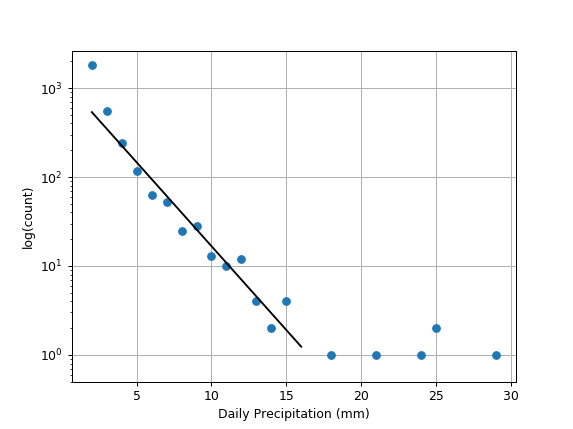

(0.5, 2629.093673969268)

In [55]:
total = count.sum()
p = 1/precip.mean()
print (p)
count_hat = total * p * np.exp(-p*x[1:])
xhat = x[1:][count_hat >= 1]
count_hat = count_hat[count_hat >= 1]

fig, ax = plt.subplots()

ax.semilogy(x[1:], count, 'o')
ax.semilogy(xhat, count_hat, '-k')
ax.grid(True)
ax.set_ylabel('log(count)')
ax.set_xlabel('Daily Precipitation (mm)')
ax.set_ylim(0.5,)

In [56]:
precip.size/df.index.size

0.11571254567600488

In [60]:
p8_4 = df[(df.index.dt.month < 5) & (df.index.dt.month >7)]['amount'].values

AttributeError: 'Index' object has no attribute 'dt'

In [61]:
df.index

Index([ '1954 5 1',  '1954 5 2',  '1954 5 3',  '1954 5 4',  '1954 5 5',
        '1954 5 6',  '1954 5 7',  '1954 5 8',  '1954 5 9', '1954 5 10',
       ...
       '1991 3 22', '1991 3 23', '1991 3 24', '1991 3 25', '1991 3 26',
       '1991 3 27', '1991 3 28', '1991 3 29', '1991 3 30', '1991 3 31'],
      dtype='object', name='time', length=25451)

In [83]:
(dt.datetime(2017,4,30) - dt.datetime(2016,8,1)).days * 0.15

40.8